In [33]:
from __future__ import division

import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = pd.read_csv( '/home/ubuntu/train.csv' )
testing_data  = pd.read_csv( '/home/ubuntu/test.csv' )

In [3]:
training_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
testing_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [25]:
print '####################################################'

print 'Total number of question pairs for training: {}'.format(len( training_data ))
print 'Total number of duplicate question pairs: {}%'.format(round( training_data['is_duplicate'].mean()*100 ))

print '####################################################'

question_ids = pd.Series( training_data['qid1'].tolist() + training_data['qid2'].tolist() )
print 'Total number of questions in the training data: {}'.format( len(np.unique(question_ids)) )
print('Number of questions that appear multiple times: {}'.format( np.sum(question_ids.value_counts() > 1 )))

print '####################################################'

training_questions = pd.Series( training_data['question1'].tolist() + training_data['question2'].tolist() ).astype(str)

print('Training questions with question marks: {:.2f}%'.format(np.mean(training_questions.apply(lambda x: '?' in x)) * 100))
print('Training questions with [math] tags: {:.2f}%'.format(np.mean(training_questions.apply(lambda x: '[math]' in x)) * 100))
print('Training questions with full stops: {:.2f}%'.format(np.mean(training_questions.apply(lambda x: '.' in x)) * 100))
print('Training questions with capitalised first letters: {:.2f}%'.format(np.mean(training_questions.apply(lambda x: x[0].isupper())) * 100))
print('Training questions with capital letters: {:.2f}%'.format(np.mean(training_questions.apply(lambda x: max([y.isupper() for y in x]))) * 100))
print('Training questions with numbers: {:.2f}%'.format(np.mean(training_questions.apply(lambda x: max([y.isdigit() for y in x]))) * 100))

print '####################################################'

####################################################
Total number of question pairs for training: 404290
Duplicate pairs: 37.0%
####################################################
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780
####################################################
Training questions with question marks: 99.87%
Training questions with [math] tags: 0.12%
Training questions with full stops: 6.31%
Training questions with capitalised first letters: 99.81%
Training questions with capital letters: 99.95%
Training questions with numbers: 11.83%
####################################################


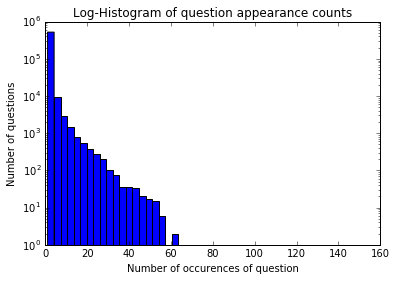

In [26]:
####################################################

question_ids = pd.Series( training_data['qid1'].tolist() + training_data['qid2'].tolist() )

plt.hist(question_ids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

####################################################

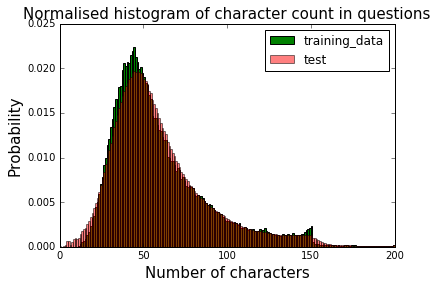

In [17]:
####################################################

training_questions = pd.Series( training_data['question1'].tolist() + training_data['question2'].tolist() ).astype(str)
testing_questions  = pd.Series( testing_data['question1'].tolist()  + testing_data['question2'].tolist() ).astype(str)

training_distribution = training_questions.apply(len)
testing_distribution  = testing_questions.apply(len)

####################################################

plt.hist (
          x      = training_distribution, 
          bins   = 200, 
          range  = [0, 200], 
          color  = 'green', 
          normed = True, 
          label  = 'training_data'
         )

plt.hist (
          x      = testing_distribution, 
          bins   = 200, 
          range  = [0, 200], 
          color  = 'red', 
          normed = True, 
          alpha  = 0.5, 
          label  = 'testing_data'
         )

plt.title (
           s        = 'Normalised histogram of character count in questions', 
           fontsize = 15
          )

plt.xlabel (
            s        = 'Number of characters', 
            fontsize = 15
           )

plt.ylabel (
            s        = 'Probability', 
            fontsize = 15
           )

plt.legend()

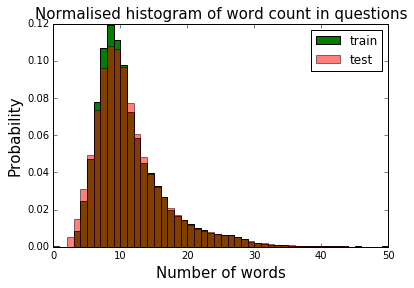

In [18]:
####################################################

training_questions = pd.Series( training_data['question1'].tolist() + training_data['question2'].tolist() ).astype(str)
testing_questions  = pd.Series( testing_data['question1'].tolist()  + testing_data['question2'].tolist() ).astype(str)

training_distribution = training_questions.apply(lambda x: len(x.split(' ')))
testing_distribution  = testing_questions.apply(lambda x: len(x.split(' ')))

####################################################

plt.hist (
          x      = training_distribution, 
          bins   = 50, 
          range  = [0, 50], 
          color  = 'green', 
          normed = True, 
          label  = 'training_data'
         )

plt.hist (
          x      = testing_distribution, 
          bins   = 50, 
          range  = [0, 50], 
          color  = 'red', 
          normed = True, 
          alpha  = 0.5, 
          label  = 'testing_data'
         )

plt.title (
           s        = 'Normalised histogram of word count in questions', 
           fontsize = 15
          )

plt.xlabel (
            s        = 'Number of words', 
            fontsize = 15
           )

plt.ylabel (
            s        = 'Probability', 
            fontsize = 15
           )

plt.legend()

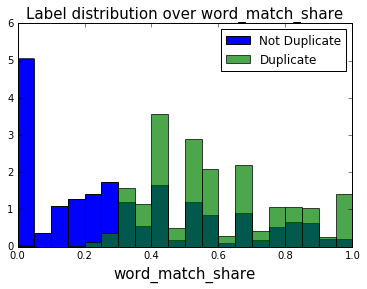

In [35]:

stops = set(nltk.corpus.stopwords.words("english"))

####################################################

def word_match_simple_count ( row ):
    
    question1_words = {}
    question2_words = {}
    
    for word in str( row['question1'] ).lower().split():
        
        if word not in stops:
            
            question1_words[word] = 1
            
    for word in str( row['question2'] ).lower().split():
        
        if word not in stops:
            
            question2_words[word] = 1
            
    if len(question1_words) == 0 or len(question2_words) == 0:
        return 0
    
    words_shared_question1 = [word for word in question1_words.keys() if word in question2_words]
    words_shared_question2 = [word for word in question2_words.keys() if word in question1_words]
    
    return ( len(words_shared_question1) + len(words_shared_question2) ) / \
           ( len(question1_words)        + len(question2_words)        )

####################################################

training_data_word_match = training_data.apply (
                                                func = word_match_simple_count, 
                                                axis = 1, 
                                                raw  = True
                                               )

plt.hist (
          x      = training_data_word_match[training_data['is_duplicate'] == 0], 
          bins   = 20, 
          normed = True, 
          label  = 'Not Duplicate'
         )

plt.hist ( 
          x      = training_data_word_match[training_data['is_duplicate'] == 1], 
          bins   = 20, 
          normed = True, 
          alpha  = 0.7, 
          label  = 'Duplicate'
         )

plt.title (
           s        = 'Label distribution over word_match_share', 
           fontsize = 15
          )

plt.xlabel (
            s        = 'word_match_share', 
            fontsize = 15
           )

plt.legend()

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)

transformer 

#training_questions = pd.Series( training_data['question1'].tolist() + training_data['question2'].tolist() ).astype(str)
#testing_questions  = pd.Series( testing_data['question1'].tolist()  + testing_data['question2'].tolist() ).astype(str)

counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

tfidf = transformer.fit_transform(counts)

tfidf.toarray() 

#print tf.get_feature_names()

#print len(training_questions)



#print tf.get_feature_names()[200:210]

array([[ 0.81940995,  0.        ,  0.57320793],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.47330339,  0.88089948,  0.        ],
       [ 0.58149261,  0.        ,  0.81355169]])

In [39]:
# Label distribution over word_order_similarity

In [40]:
# Label distribution over semantic_similarity
# http://sujitpal.blogspot.ca/2014/12/semantic-similarity-for-short-sentences.html

In [41]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# tfidf - rare words
# from sklearn.feature_extraction.text import TfidfTransformer
# https://chisqr.wordpress.com/2017/07/03/classifying-duplicate-questions-with-tensorflow/

In [42]:
# from difflib import SequenceMatcher

In [ ]:
# from nltk.corpus import wordnet as wn
# nltk.word_tokenize

In [86]:
# https://github.com/abhishekkrthakur/is_that_a_duplicate_quora_question/blob/master/feature_engineering.py